In [1]:
import os
%matplotlib inline 
import matplotlib.pyplot as plt #1st usage chap 1
import numpy as np #1st usage chap 1
import pandas as pd #1st usage chap 1
import scipy.stats as stats #1st usage chap 2
from scipy.stats import linregress #1st usage chap 2
from pandas import Series, DataFrame #1st usage chap 3
import numpy.random as rnd #1st usage chap 3
import urllib.request #1st used chap 4
#import pandas.io.data #1st used chap 4
import matplotlib.patches as patches #1st used chap 4
import matplotlib.transforms as transforms #1st used chap 4
import statsmodels.formula.api as smf #1st used chap 4
from statsmodels.sandbox.regression.predstd import wls_prediction_std #1st used chap 4
from pandas_datareader import data, wb #==from pandas.io import data,wb #1st used chap 4
import statsmodels.api as sm #1st used chap 4
from mpl_toolkits.mplot3d import Axes3D #1st used chap 4

In [166]:
import scipy.cluster.hierarchy as hac #1st used chap 5
import scipy.cluster.vq as vq #1st used chap 5
from matplotlib.patches import Ellipse #1st used chap 5
import astropy.coordinates as coord #1st used chap 5
import astropy.units as u #1st used chap 5
import astropy.constants as c #1st used chap 5
from matplotlib.patheffects import withStroke #1st used chap 5

# Chapter 1
- Overview of the tools available for data analysis in Python
- How to read data files, select data, and produce simple plots, instead of delving into numerical data analysis

In [3]:
plt.style.use('seaborn-pastel')

In [4]:
cols = ['user id', 'item id', 'rating', 'timestamp']
ratings = pd.read_csv('data/ratings.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [5]:
ratings.head()

,user id,item id,rating,timestamp
0,1,1074638,7,1365029107
1,1,1853728,8,1366576639
2,2,104257,8,1364690142
3,2,1259521,8,1364118447
4,2,1991245,7,1364117717


In [6]:
rating_counts = ratings['rating'].value_counts()
rating_counts

8     12012
7     11063
9      7119
6      6373
10     6281
5      3399
4      1696
3       924
1       595
2       533
0         5
Name: rating, dtype: int64

In [7]:
sorted_counts = rating_counts.sort_index()
sorted_counts

0         5
1       595
2       533
3       924
4      1696
5      3399
6      6373
7     11063
8     12012
9      7119
10     6281
Name: rating, dtype: int64

Text(0,0.5,'Count')

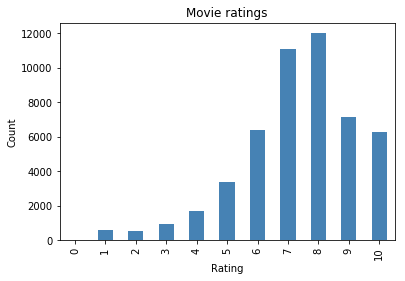

In [8]:
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

**Ratings distribution for a particular movie genre,say "Crime Drama", is similar to the overall distribution.**

In [9]:
cols = ['movie id','movie title','genre']
movies = pd.read_csv('data/movies.dat', sep='::',index_col=False, names=cols,encoding="UTF-8")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [10]:
movies.head()

,movie id,movie title,genre
0,2844,Fantômas - À l'ombre de la guillotine (1913),Crime|Drama
1,4936,The Bank (1915),Comedy|Short
2,7264,The Rink (1916),Comedy|Short
3,8133,The Immigrant (1917),Short|Comedy|Drama|Romance
4,9968,Broken Blossoms or The Yellow Man and the Girl...,Drama|Romance


In [11]:
cridra=movies[movies['genre']=='Crime|Drama']

In [12]:
is_cridra = movies['genre']== 'Crime|Drama'
is_cridra.head()

0     True
1    False
2    False
3    False
4    False
Name: genre, dtype: bool

In [13]:
cridra_ids=cridra['movie id']
cridra_ids.head()

0       2844
54     23817
208    40522
236    42876
251    44515
Name: movie id, dtype: int64

In [14]:
criterion = ratings['item id'].map(lambda x: (cridra_ids == x).any())
cridra_ratings = ratings[criterion]
cridra_ratings.head()

,user id,item id,rating,timestamp
128,18,86066,10,1363985505
150,23,1212450,8,1364166586
176,26,1817273,8,1367761386
194,36,68646,9,1364834910
195,36,71562,10,1365005772


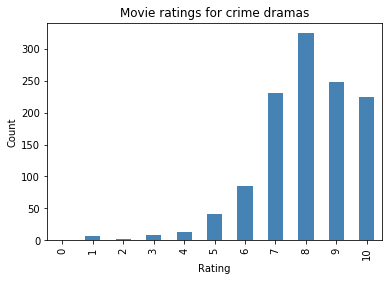

In [15]:
rating_counts = cridra_ratings['rating'].value_counts()
sorted_counts = rating_counts.sort_index()
sorted_counts.plot(kind='bar', color='SteelBlue')
plt.title('Movie ratings for crime dramas')
plt.xlabel('Rating')
plt.ylabel('Count');

# Chapter 2
- How to use Pandas to perform an initial exploration of the data.
- Performing the initial exploration and cleaning of data
- Displays of data, including histograms, KDE (kernel density estimate) plots and boxplots forunivariate distributions, and scatterplots for bivariate relationships.
- Giving an initial overview of various point estimates of the data, such as mean, standard deviation, range, median, quartiles, and percentiles.

In [16]:
gss_data = pd.read_stata('data/GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
gss_data.set_index('id')
gss_data.drop('id', 1, inplace=True)
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
gss_data.to_csv('data/GSS2012merged.csv')

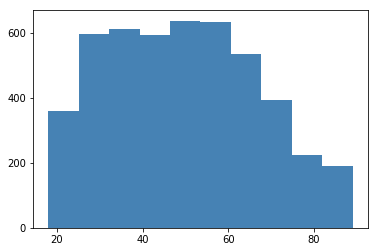

In [19]:
gss_data['age'].hist(color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

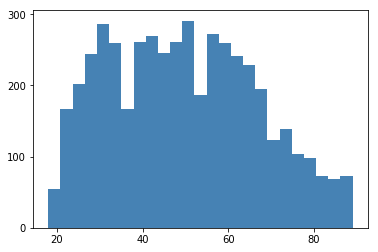

In [20]:
gss_data['age'].hist(bins=25, color='SteelBlue')
plt.grid()
plt.locator_params(nbins=5)

In [21]:
inc_age = gss_data[['realrinc','age']]
inc_age.head(10)

,realrinc,age
0,NaN,22.0
1,NaN,21.0
2,58800.0,42.0
3,NaN,49.0
4,NaN,70.0
5,NaN,50.0
6,NaN,35.0
7,NaN,24.0
8,NaN,28.0
9,15925.0,28.0


In [22]:
inc_age = gss_data[['realrinc','age']].dropna()
inc_age.head(10)

,realrinc,age
2,58800.0,42.0
9,15925.0,28.0
11,3185.0,36.0
14,7962.5,52.0
15,26950.0,35.0
16,26950.0,36.0
17,22050.0,47.0
18,33075.0,55.0
22,33075.0,54.0
23,49000.0,45.0


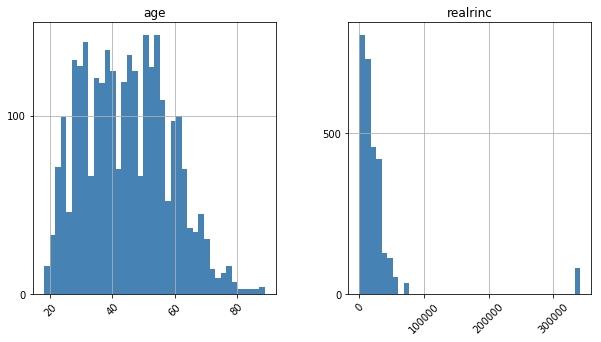

In [23]:
ax_list = inc_age.hist(bins=40, figsize=(10,5), xrot=45, color='SteelBlue')
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [24]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [25]:
inc_age[inc_age['realrinc'] >3.0E5].head(10)

,realrinc,age
42,341672.3793,51.0
43,341672.3793,57.0
44,341672.3793,44.0
47,341672.3793,68.0
54,341672.3793,46.0
126,341672.3793,53.0
241,341672.3793,61.0
261,341672.3793,55.0
263,341672.3793,43.0
401,341672.3793,37.0


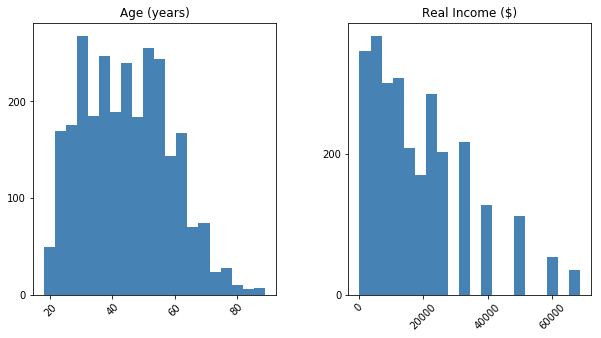

In [26]:
lowinc_age = inc_age[inc_age['realrinc'] <3.0E5]
ax_list = lowinc_age.hist(bins=20, figsize=(10,5), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age (years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x' ,nbins=6)
    ax.locator_params(axis='y' ,nbins=3)

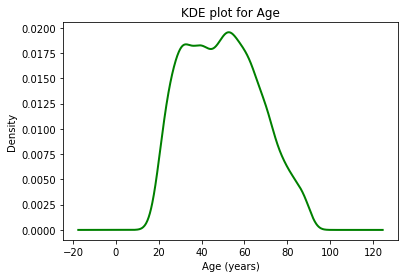

In [27]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)');

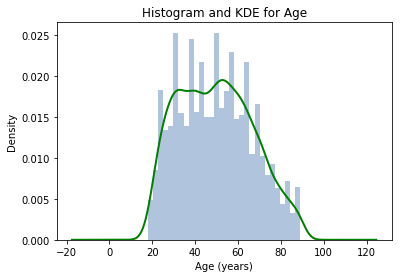

In [28]:
ax = age.hist(bins=30, color='LightSteelBlue', density=True)
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)');

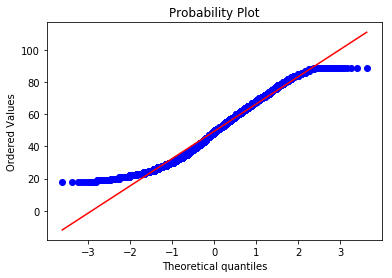

In [29]:
stats.probplot(age, dist='norm', plot=plt);

In [30]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc <3.0E5]
lowinc.describe(percentiles=np.arange(0, 1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30.0%     9187.500000
40%      11637.500000
50%      15925.000000
60.0%    18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

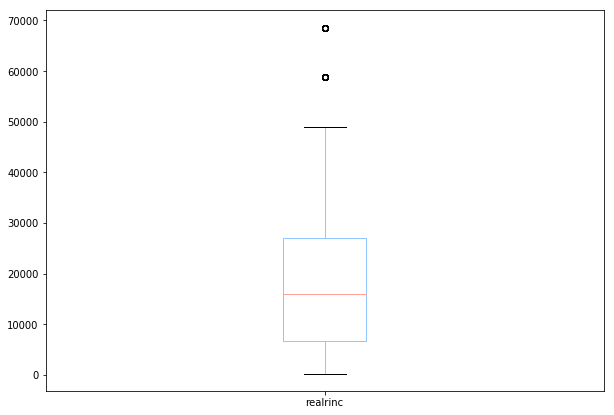

In [31]:
lowinc.plot(kind='box', figsize=(10,7));#Histogram+kind='hist' ; KDE=kind='kde'

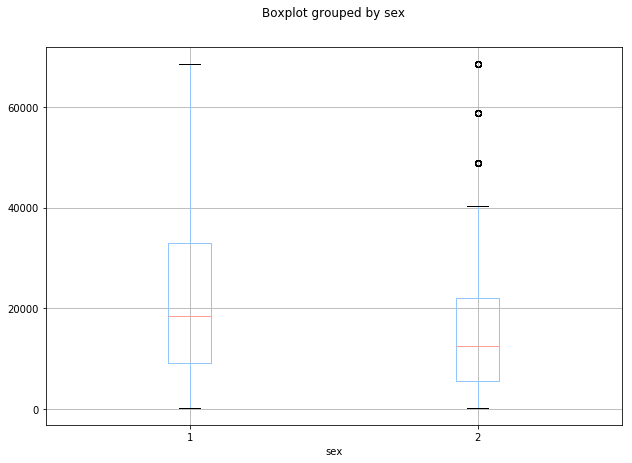

In [32]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 3.0E5]
inc_gen.boxplot(column='realrinc', by='sex',figsize=(10,7))
plt.title('')
plt.locator_params(nbins=5);

In [33]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


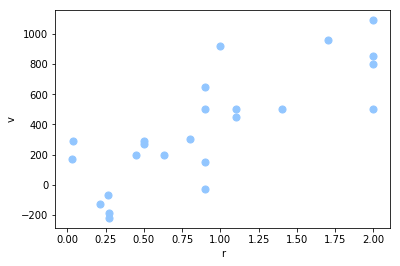

In [34]:
hubble_data.plot(kind='scatter', x='r',y='v', s=50);

In [35]:
rv = hubble_data.as_matrix(columns=['r','v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

454.15844092262836 -40.78364909586037 0.7896394879353182 4.477491000609172e-06 75.23710534716909


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


> a: This is the slope of the regression line
b: This is the intercept of the regression line
r: This is the correlation coefficient
p: This is the two-sided p-value for the hypotheses test-for the null hypothesis that
assumes the slope is zero
stderr: This is the standard error of the estimate

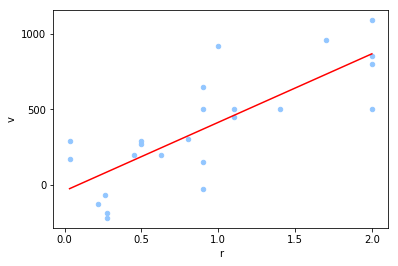

In [36]:
hubble_data.plot(kind='scatter', x='r', y='v')
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='red', lw=1.5)
plt.locator_params(nbins=5);

# Chapter 3
- Using basic models in data analysis
- Using the cumulative distribution function and probability density function to characterize a variable
- Using the preceding functions and various tools to make point estimates and generating random numbers with a certain distribution
- Discussing examples of discrete and continuous random variables and an overview of multivariate distributions

In [37]:
mean = 0
sdev = 1
nvalues = 10
norm_variate = mean + sdev * rnd.randn(nvalues)
print(norm_variate)

[-0.66901783  0.47754308  1.06248504  2.16131056  1.41188597 -0.88444634
  0.60732199 -0.44587229  0.98797804  1.20125908]


In [38]:
for i, v in enumerate(sorted(norm_variate), start=1):
    print('{0:2d} {1:+.4f}'.format(i, v))

 1 -0.8844
 2 -0.6690
 3 -0.4459
 4 +0.4775
 5 +0.6073
 6 +0.9880
 7 +1.0625
 8 +1.2013
 9 +1.4119
10 +2.1613


In [39]:
def plot_cdf(data, plot_range=None, scale_to=None, **kwargs):
    num_bins= len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=num_bins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    # pad the arrays
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0],        yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)

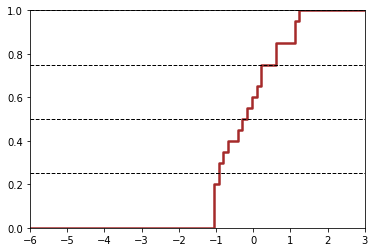

In [40]:
nvalues = 20
#rnd.seed(123) # to get identical results every time
norm_variates = rnd.randn(nvalues)
axes = plot_cdf(norm_variates, plot_range=[-6,3], scale_to=1., 
         lw=2.5, color='Brown')
for v in [0.25, 0.5, 0.75, 1.0]:
    plt.axhline(v, lw=1, ls='--', color='black')

In [41]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
print(wing_lengths)

[36 37 38 38 39 39 40 40 40 40 41 41 41 41 41 41 42 42 42 42 42 42 42 43
 43 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 45 45 45 45 45 45 45 45
 45 45 46 46 46 46 46 46 46 46 46 46 47 47 47 47 47 47 47 47 47 48 48 48
 48 48 48 48 48 49 49 49 49 49 49 49 50 50 50 50 50 50 51 51 51 51 52 52
 53 53 54 55]


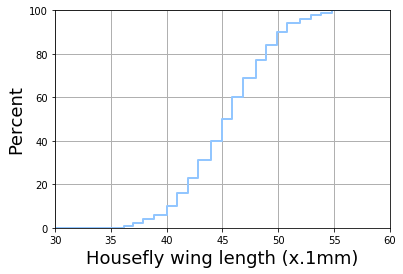

In [42]:
plot_cdf(wing_lengths, plot_range=[30, 60], scale_to=100, lw=2)
plt.grid(lw=1)
plt.xlabel('Housefly wing length (x.1mm)', fontsize=18)
plt.ylabel('Percent', fontsize=18);

###### Scipy.stats Methods
|Function | Description|
|:---------| :-----------|
|rvs()  | Random variates, that is, pseudorandom number generation|
|cdf()  | Cumulative distribution function|
|pdf() or pmf() | Probability density function (for continuous variables) and probability mass function (for discrete variables)|
|ppf() | Percent point function, the inverse of the cumulative distribution function|
|stats() | Compute statistics (moments) for distribution|
|mean(), std(),or var() | Compute mean, standard deviation, and variance, respectively|
|fit() | Fit data to the distribution and return the parameters for the shape,location, and scale parameters from the data|

In [43]:
N = 4857
mean = 63.8
serror = 0.06
sdev = serror * np.sqrt(N)
rvnorm = stats.norm(loc=mean, scale=sdev)

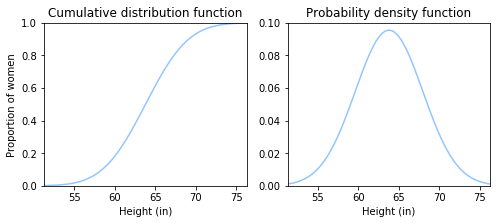

In [44]:
xmin = mean-3*sdev
xmax = mean+3*sdev
xx = np.linspace(xmin,xmax,200)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.plot(xx, rvnorm.cdf(xx))
plt.title('Cumulative distribution function')
plt.xlabel('Height (in)')
plt.ylabel('Proportion of women')
plt.axis([xmin, xmax, 0.0, 1.0])
plt.subplot(1,2,2)
plt.plot(xx, rvnorm.pdf(xx))
plt.title('Probability density function')
plt.xlabel('Height (in)')
plt.axis([xmin, xmax, 0.0, 0.1]);

In [45]:
rvnorm.cdf(68)

0.8424111333807798

In [46]:
rvnorm.cdf(63)

0.4241384277767544

In [47]:
100 * (rvnorm.cdf(68) - rvnorm.cdf(63))

41.82727056040253

In [48]:
categories = [
    ('Petite', 59, 63),
    ('Average', 63, 68),
    ('Tall', 68, 71),
]
for cat, vmin, vmax in categories:
    percent = 100*(rvnorm.cdf(vmax)-rvnorm.cdf(vmin))
    print('{0:>8s}: {1:.2f}'.format(cat, percent))

  Petite: 29.86
 Average: 41.83
    Tall: 11.50


In [49]:
too_short = 100*rvnorm.cdf(59)
too_tall = 100*(1 - rvnorm.cdf(71))
unclassified = too_short + too_tall
print(too_short, too_tall, unclassified)

12.55038986608284 4.254767214713451 16.805157080796292


In [50]:
a = rvnorm.ppf(0.25)
b = rvnorm.ppf(0.75)
print (a, b)

60.97960032166886 66.62039967833113


- The mean is the average value of the distribution. As the distribution is symmetric, it coincides with the median.
- The variance is the square of the standard deviation. It is defined as the average value of the square of the deviation from the mean.
- The skew measures the asymmetry of the distribution. As the Normal distribution is symmetric, the skew is zero.
- The kurtosis indicates how the distribution peaks: does it have a sharp peak or a flatter bump? The value of kurtosis for the Normal distribution is zero because it is used as a reference distribution.

In [51]:
mean, variance, skew, kurtosis = rvnorm.stats(moments='mvks')
print(mean, variance, skew, kurtosis)

63.8 17.485200000000003 0.0 0.0


In [52]:
eta = 1.0
beta = 1.5
rvweib = stats.weibull_min(beta, scale=eta)

In [53]:
weib_variates = rvweib.rvs(size=500)
print(weib_variates[:10])

[1.82539309 0.96008874 0.1951793  0.65367804 2.70381643 0.31423825
 0.3554541  0.43810786 0.21619671 0.41306055]


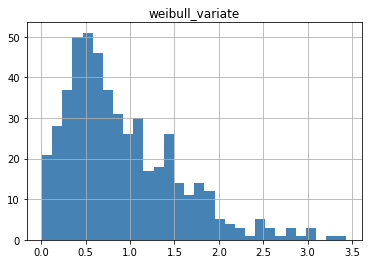

In [54]:
weib_df = DataFrame(weib_variates,columns=['weibull_variate'])
weib_df.hist(bins=30,color='steelblue');

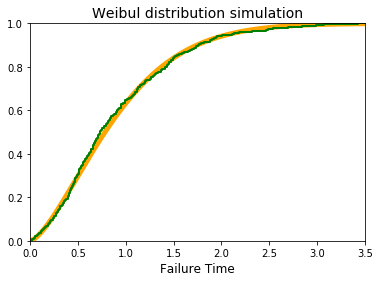

In [55]:
xmin = 0
xmax = 3.5
xx = np.linspace(xmin,xmax,200)
plt.plot(xx, rvweib.cdf(xx), color='orange', lw=5)
plot_cdf(weib_variates, plot_range=[xmin, xmax], scale_to=1, lw=2,
color='green')
plt.axis([xmin, xmax, 0, 1])
plt.title('Weibul distribution simulation', fontsize=14)
plt.xlabel('Failure Time', fontsize=12);

In [56]:
wing_lengths = np.fromfile('data/housefly-wing-lengths.txt', sep='\n', dtype=np.int64)
mean, std = stats.norm.fit(wing_lengths)
print(mean, std)

45.5 3.9


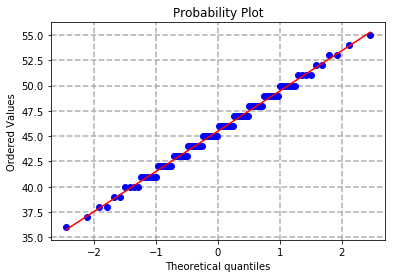

In [57]:
stats.probplot(wing_lengths, dist='norm', plot=plt)
plt.grid(lw=1.5, ls='dashed');

In [58]:
N = 20
p = 0.5
rv_binom = stats.binom(N, p)

In [59]:
rv_binom.pmf(12)

0.12013435363769531

In [60]:
rv_binom.cdf(7)

0.13158798217773435

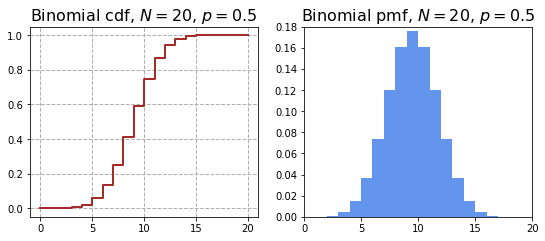

In [61]:
xx = np.arange(N+1)
cdf = rv_binom.cdf(xx)
pmf = rv_binom.pmf(xx)
xvalues = np.arange(N+1)
plt.figure(figsize=(9,3.5))
plt.subplot(1,2,1)
plt.step(xvalues, cdf, lw=2, color='brown')
plt.grid(lw=1, ls='dashed')
plt.title('Binomial cdf, $N=20$, $p=0.5$', fontsize=16)
plt.subplot(1,2,2)
left = xx - 0.5
plt.bar(left, pmf, 1.0, color='CornflowerBlue')
plt.title('Binomial pmf, $N=20$, $p=0.5$', fontsize=16)
plt.axis([0, 20, 0, .18]);

In [62]:
mean = rv_binom.mean()
std = rv_binom.std()
print(mean, std)

10.0 2.23606797749979


In [63]:
mean = N * p
std = np.sqrt(N * p * (1 - p))
print(mean, std)

10.0 2.23606797749979


In [64]:
binorm_variates = stats.multivariate_normal.rvs(mean=[0,0], size=300)
df = DataFrame(binorm_variates, columns=['Z1', 'Z2'])
df.head(10)

,Z1,Z2
0,1.567341,1.369654
1,2.848914,-1.198207
2,-0.888477,-0.805383
3,-1.033970,-1.986411
4,2.054341,-0.417598
5,-1.405464,-0.223587
6,1.372934,-0.593599
7,0.197592,0.065594
8,-0.785261,-0.516480
9,-0.512041,0.641920


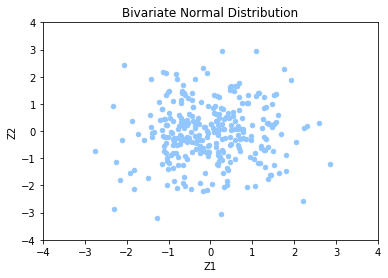

In [65]:
df.plot(kind='scatter', x='Z1', y='Z2')
plt.title('Bivariate Normal Distribution')
plt.axis([-4,4,-4,4]);

# Chapter 4
##### Regression
- Linear regression
- Multiple regression
- Logistic regression

In [66]:
#suicide_rate_url = 'http://apps.who.int/gho/athena/data/xmart.csv?target=GHO/MH_12&profile=crosstable&filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY&x-topaxis=GHO;YEAR;SEX'
#local_filename, headers = urllib.request.urlretrieve(suicide_rate_url, filename='data/who_suicide_rates.csv')

In [67]:
LOCAL_FILENAME = 'data/who_suicide_rates.csv_backup'
rates = pd.read_csv(LOCAL_FILENAME, names=['Country','Both','Female', 'Male'], skiprows=3)
rates.head(10)

,Country,Both,Female,Male
0,Afghanistan,5.7,5.3,6.2
1,Albania,5.9,5.2,6.6
2,Algeria,1.9,1.5,2.3
3,Angola,13.8,7.3,20.7
4,Argentina,10.3,4.1,17.2
5,Armenia,2.9,0.9,5.0
6,Australia,10.6,5.2,16.1
7,Austria,11.5,5.4,18.2
8,Azerbaijan,1.7,1.0,2.4
9,Bahamas,2.3,1.3,3.6


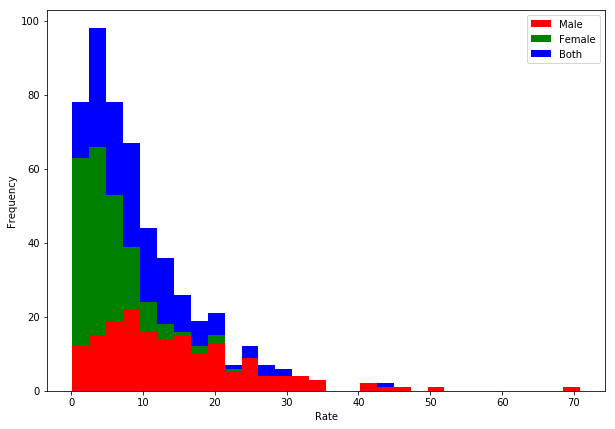

In [68]:
rates.plot.hist(stacked=True, y=['Male', 'Female','Both'], bins=30, color=['Red', 'Green','Blue'], figsize=(10,7))
plt.xlabel('Rate');

In [69]:
print(rates['Male'].mean(), rates['Female'].mean(),rates['Both'].mean())

14.69590643274854 5.0707602339181275 9.699415204678369


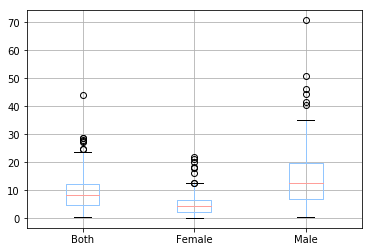

In [70]:
rates.boxplot();

In [71]:
print('Outliers For Male')
print(rates[rates['Male']>70])

Outliers For Male
   Country  Both  Female  Male
66  Guyana  44.2    22.1  70.8


In [72]:
print('Outliers For Female')
print(rates[rates['Female']>20])

Outliers For Female
        Country  Both  Female  Male
66       Guyana  44.2    22.1  70.8
105  Mozambique  27.4    21.1  34.2


In [73]:
print('Outliers For Both')
print(rates[rates['Both']>40])

Outliers For Both
   Country  Both  Female  Male
66  Guyana  44.2    22.1  70.8


In [74]:
def plot_cdf(data, plot_range=None, scale_to=None, nbins=False, **kwargs):
    if not nbins:
        nbins= len(data)
    sorted_data = np.array(sorted(data), dtype=np.float64)
    data_range = sorted_data[-1] - sorted_data[0]
    counts, bin_edges = np.histogram(sorted_data, bins=nbins)
    xvalues = bin_edges[1:]
    yvalues = np.cumsum(counts)
    if plot_range is None:
        xmin = xvalues[0]
        xmax = xvalues[-1]
    else:
        xmin, xmax = plot_range
    # pad the arrays
    xvalues = np.concatenate([[xmin, xvalues[0]], xvalues, [xmax]])
    yvalues = np.concatenate([[0.0, 0.0],        yvalues, [yvalues.max()]])
    if scale_to:
        yvalues = yvalues / len(data) * scale_to
    plt.axis([xmin, xmax, 0, yvalues.max()])
    return plt.step(xvalues, yvalues, **kwargs)

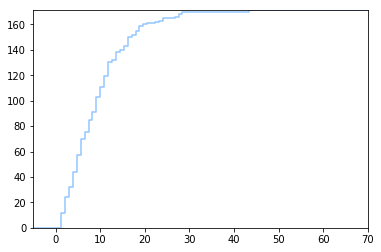

In [75]:
plot_cdf(rates['Both'], nbins=50, plot_range=[-5, 70]);

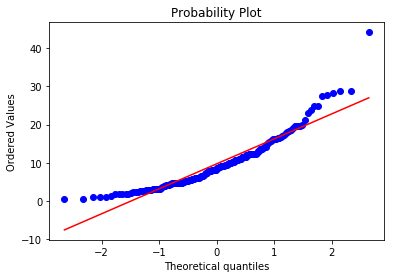

In [76]:
stats.probplot(rates['Both'], dist='norm', plot=plt);

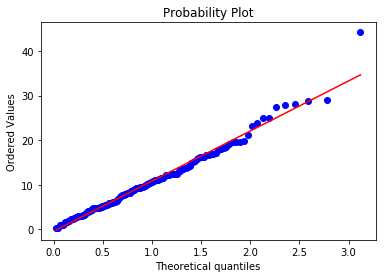

In [77]:
beta = 1.5
eta = 1.
rvweib = stats.weibull_min(beta, scale=eta)
stats.probplot(rates['Both'], dist=rvweib, plot=plt);

In [78]:
beta, loc, eta = stats.weibull_min.fit(rates['Both'],floc=0, scale = 12)
print(beta, loc, eta)

1.4851142482688444 0 10.760147674324672


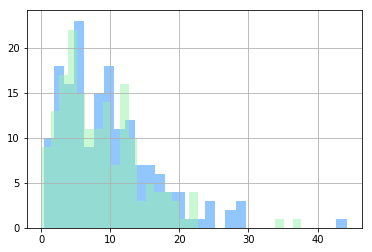

In [79]:
rates['Both'].hist(bins=30)
np.random.seed(1100)
rvweib = stats.weibull_min(beta, scale=eta)
plt.hist(rvweib.rvs(size=len(rates.Both)),bins=30, alpha=0.5);

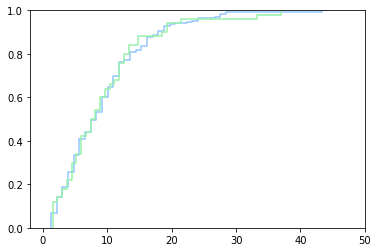

In [80]:
plot_cdf(rates['Both'], nbins=50,scale_to=1)
np.random.seed(1100)
plot_cdf(rvweib.rvs(size=50),scale_to=1)
plt.xlim((-2,50));

In [81]:
coords=pd.read_csv('data/country_centroids/country_centroids_primary.csv',sep='\t')
coords.keys()

Index(['LAT', 'LONG', 'DMS_LAT', 'DMS_LONG', 'MGRS', 'JOG', 'DSG', 'AFFIL',
       'FIPS10', 'SHORT_NAME', 'FULL_NAME', 'MOD_DATE', 'ISO3136'],
      dtype='object')

In [82]:
coords.head()

,LAT,LONG,DMS_LAT,DMS_LONG,MGRS,JOG,DSG,AFFIL,FIPS10,SHORT_NAME,FULL_NAME,MOD_DATE,ISO3136
0,33.000000,66.0,330000,660000,42STB1970055286,NI42-09,PCLI,NaN,AF,Afghanistan,Islamic Republic of Afghanistan,2009-04-10,AF
1,41.000000,20.0,410000,200000,34TDL1589839239,NK34-08,PCLI,NaN,AL,Albania,Republic of Albania,2007-02-28,AL
2,28.000000,3.0,280000,30000,31REL0000097202,NH31-15,PCLI,NaN,AG,Algeria,People's Democratic Republic of Algeria,2011-03-03,DZ
3,-14.333333,-170.0,-142000,-1700000,1802701,NaN,PCLD,US,AS,American Samoa,Territory of American Samoa,1998-10-06,AS
4,42.500000,1.5,423000,13000,31TCH7675006383,NK31-04,PCLI,NaN,AN,Andorra,Principality of Andorra,2007-02-28,AD


In [83]:
rates['Lat'] = ''
rates['Lon'] = ''
for i in coords.index:
    ind = rates.Country.isin([coords.SHORT_NAME[i]])
    val = coords.loc[i, ['LAT', 'LONG']].values.astype('float')
    rates.loc[ind, ['Lat', 'Lon'] ] = list(val)

In [84]:
rates.head()

,Country,Both,Female,Male,Lat,Lon
0,Afghanistan,5.7,5.3,6.2,33,66
1,Albania,5.9,5.2,6.6,41,20
2,Algeria,1.9,1.5,2.3,28,3
3,Angola,13.8,7.3,20.7,-12.5,18.5
4,Argentina,10.3,4.1,17.2,-34,-64


In [85]:
rates.loc[rates.Lat.isin(['']), ['Lat']] = np.nan
rates.loc[rates.Lon.isin(['']), ['Lon']] = np.nan
rates[['Lat', 'Lon']] = rates[['Lat', 'Lon']].astype('float')

In [86]:
rates['DFE'] = ''
rates['DFE'] = abs(rates.Lat)
rates['DFE'] = rates['DFE'].astype('float')

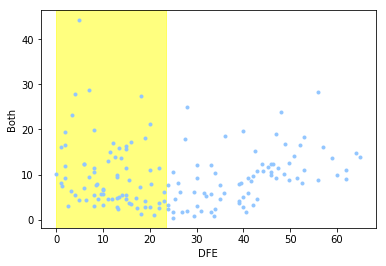

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(rates.DFE, rates.Both, '.')
trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
rect = patches.Rectangle((0,0), width=23.5, height=1,
transform=trans, color='yellow', alpha=0.5)
ax.add_patch(rect)
ax.set_xlabel('DFE')
ax.set_ylabel('Both');

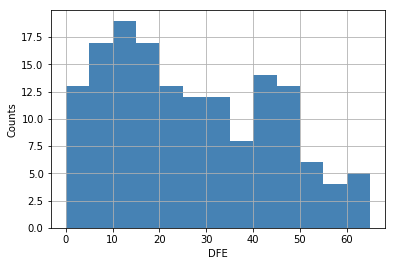

In [88]:
rates.DFE.hist(bins=13,color='SteelBlue')
plt.xlabel('DFE')
plt.ylabel('Counts');

In [89]:
bins = np.arange(23.5, 65+1,10, dtype='float')
groups_rates = rates.groupby(np.digitize(rates.DFE, bins))

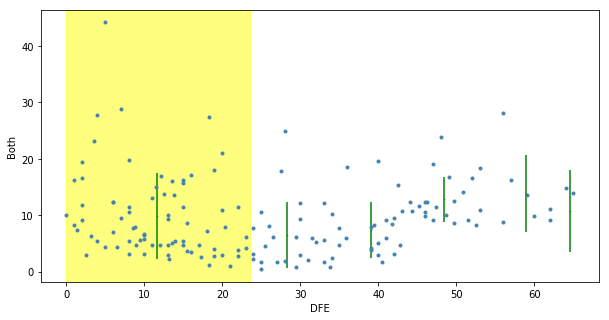

In [90]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.errorbar(groups_rates.mean().DFE, groups_rates.mean().Both, yerr=np.array(groups_rates.std().Both),
            marker='.', ls='None', lw=1.5, color='Green', ms=1)
ax.plot(rates.DFE, rates.Both, '.', color='SteelBlue', ms=6)

trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
rect = patches.Rectangle((0,0), width=23.5, height=1, transform=trans, color='Yellow',  alpha=0.5)
ax.add_patch(rect)
ax.set_xlabel('DFE')
ax.set_ylabel('Both');

In [91]:
mindfe = 30.
selection = ~rates.DFE.isnull() * rates.DFE>mindfe
rv = rates[selection].as_matrix(columns=['DFE','Both'])
a, b, r, p, stderr = linregress(rv.T)
print('slope:{0:.4f}\nintercept:{1:.4f}\nrvalue:{2:.4f}\npvalue:{3:.4f}\nstderr:{4:.4f}'.format(a, b, r, p, stderr))

slope:0.3204
intercept:-4.2373
rvalue:0.5102
pvalue:0.0000
stderr:0.0715


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [92]:
mod = smf.ols("DFE ~ Both", rates[selection]).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                    DFE   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     20.06
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           3.65e-05
Time:                        17:00:13   Log-Likelihood:                -203.18
No. Observations:                  59   AIC:                             410.4
Df Residuals:                      57   BIC:                             414.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.6443      2.096     17.483      0.0

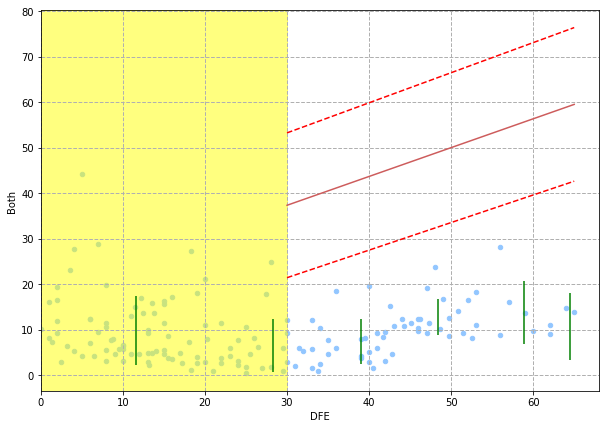

In [93]:
prstd, iv_l, iv_u = wls_prediction_std(mod)

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111)
rates.plot(kind='scatter', x='DFE', y='Both', ax=ax)

xmin, xmax = min(rates['DFE']), max(rates['DFE'])

ax.plot([mindfe, xmax], [mod.fittedvalues.min(), mod.fittedvalues.max()], 
        'IndianRed', lw=1.5)
ax.plot([mindfe, xmax], [iv_u.min(), iv_u.max()], 'r--', lw=1.5)
ax.plot([mindfe, xmax], [iv_l.min(), iv_l.max()], 'r--', lw=1.5)

ax.errorbar(groups_rates.mean().DFE, 
            groups_rates.mean().Both, 
            yerr=np.array(groups_rates.std().Both),
            ls='None',
            lw=1.5,
            color='Green')

trans = transforms.blended_transform_factory(
    ax.transData, ax.transAxes)

rect = patches.Rectangle((0,0), width=mindfe, height=1,
                         transform=trans, color='Yellow',
                         alpha=0.5)

ax.add_patch(rect)
ax.grid(lw=1, ls='dashed')
ax.set_xlim((xmin,xmax+3));

In [94]:
wb.search('gdp.*capita.*').iloc[:,:2]

,id,name
680,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation..."
5476,FB.DPT.INSU.PC.ZS,Deposit insurance coverage (% of GDP per capita)
8953,NE.GDI.FTOT.CR,GDP expenditure on gross fixed capital formati...
8960,NE.GDI.FTOT.SNA08.CR,GDP expenditure on gross fixed capital formati...
9037,NV.AGR.PCAP.KD.ZG,Real agricultural GDP per capita growth rate (%)
9259,NY.GDP.PCAP.CD,GDP per capita (current US$)
9260,NY.GDP.PCAP.CN,GDP per capita (current LCU)
9261,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$)
9262,NY.GDP.PCAP.KD.ZG,GDP per capita growth (annual %)
9263,NY.GDP.PCAP.KN,GDP per capita (constant LCU)


In [95]:
dat = wb.download(indicator='NY.GDP.PCAP.PP.CD', country='all', start=2014, end=2014)
dat.head()

,,NY.GDP.PCAP.PP.CD
country,year,
Arab World,2014,16213.193326
Caribbean small states,2014,15138.197604
Central Europe and the Baltics,2014,24984.966705
Early-demographic dividend,2014,8166.747022
East Asia & Pacific,2014,14695.656564


In [96]:
country = np.array(dat.index.tolist())[:,0]
gdp = np.array(np.array(dat['NY.GDP.PCAP.PP.CD']))
data = pd.DataFrame(data=np.array([country,gdp]).T, columns=['country', 'gdp'])
print(dat['NY.GDP.PCAP.PP.CD'].head())
print(data.head())

country                         year
Arab World                      2014    16213.193326
Caribbean small states          2014    15138.197604
Central Europe and the Baltics  2014    24984.966705
Early-demographic dividend      2014     8166.747022
East Asia & Pacific             2014    14695.656564
Name: NY.GDP.PCAP.PP.CD, dtype: float64
                          country               gdp
0                      Arab World  16213.1933263674
1          Caribbean small states  15138.1976044659
2  Central Europe and the Baltics  24984.9667048871
3      Early-demographic dividend  8166.74702158105
4             East Asia & Pacific  14695.6565639546


In [97]:
rates['GDP_CD'] = ''
for i in np.arange(len(data)):
    rates.loc[rates.Country.isin([data.country[i]]), ['GDP_CD'] ] = data.loc[i, ['gdp']].values.astype('float')
rates.loc[rates.GDP_CD.isin(['']), ['GDP_CD']] = np.nan

In [98]:
print(rates[rates.Country=='Sweden'])
print(data[data.country=='Sweden'])
print(data.loc[218, ['gdp']].values.astype('float'))
rates.loc[rates.Country.isin(['Sweden'])]

    Country  Both  Female  Male   Lat   Lon   DFE   GDP_CD
146  Sweden  11.1     6.1  16.2  62.0  15.0  62.0  47184.7
    country               gdp
234  Sweden  47184.6691338182
[84423.19134327]


,Country,Both,Female,Male,Lat,Lon,DFE,GDP_CD
146,Sweden,11.1,6.1,16.2,62.0,15.0,62.0,47184.7


In [99]:
selection = ~rates.DFE.isnull() * rates.DFE>mindfe
selection *= ~rates.GDP_CD.isnull()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


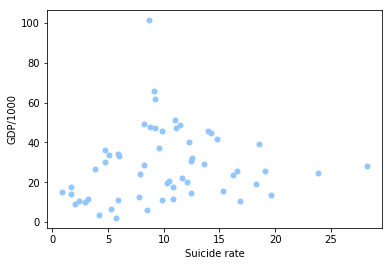

In [100]:
plt.plot(rates[selection].Both.values, rates[selection].GDP_CD.values/1000, '.', ms=10)
plt.ylabel('GDP/1000')
plt.xlabel('Suicide rate');

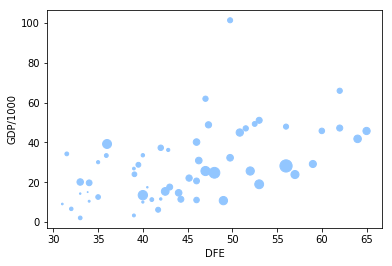

In [101]:
plt.scatter(rates[selection].DFE.values, rates[selection].GDP_CD.values/1000, s=rates[selection].Both.values**1.5)
plt.ylabel('GDP/1000')
plt.xlabel('DFE');

In [102]:
A = rates[selection][['DFE', 'GDP_CD']].astype('float')
A['GDP_CD'] = A['GDP_CD']/1000
b = rates[selection]['Both'].astype('float')
A = sm.add_constant(A)
est = sm.OLS(b, A).fit()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


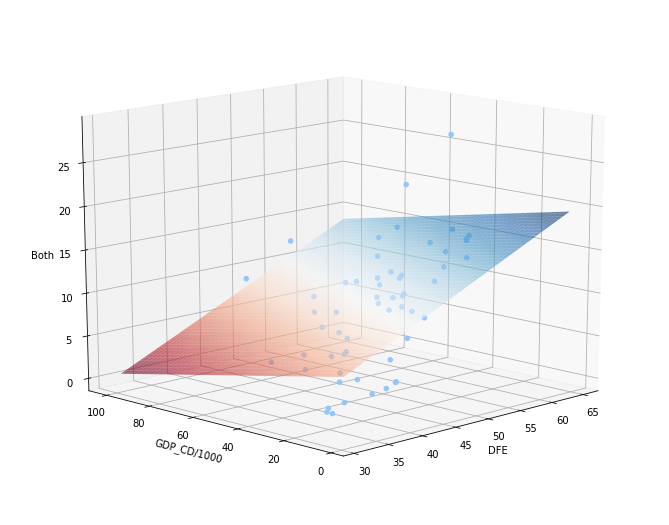

In [103]:
X, Y = np.meshgrid(np.linspace(A.DFE.min(), A.DFE.max(), 100), np.linspace(A.GDP_CD.min(), A.GDP_CD.max(), 100))
Z = est.params[0] + est.params[1] * X + est.params[2] * Y

fig = plt.figure(figsize=(9, 7))
ax = Axes3D(fig, azim=-135, elev=15)
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.RdBu, alpha=0.6, linewidth=0)

resid = b - est.predict(A)
ax.scatter(A.DFE, A.GDP_CD, b,  alpha=1.0)

ax.set_xlabel('DFE')
ax.set_ylabel('GDP_CD/1000')
ax.set_zlabel('Both');

In [104]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   Both   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     10.80
Date:                Thu, 16 Jul 2020   Prob (F-statistic):           0.000113
Time:                        17:01:09   Log-Likelihood:                -169.74
No. Observations:                  57   AIC:                             345.5
Df Residuals:                      54   BIC:                             351.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4745      3.428     -1.597      0.1

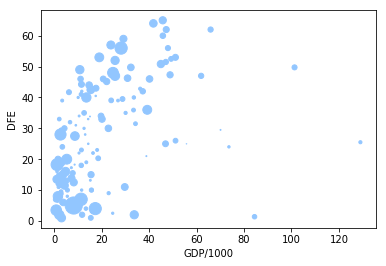

In [105]:
#%matplotlib notebook
#%matplotlib notebook#==Interactive Matplot
selection2 = ~rates.DFE.isnull()
plt.scatter(rates[selection2].GDP_CD.values/1000,
rates[selection2].DFE.values, s=rates[selection2].Both.values**1.5)
plt.xlabel('GDP/1000')
plt.ylabel('DFE');

In [106]:
data = pd.DataFrame(data=rates[['Country','Both','Male','Female','GDP_CD', 'DFE']][~rates.DFE.isnull()])
data.head()

,Country,Both,Male,Female,GDP_CD,DFE
0,Afghanistan,5.7,6.2,5.3,2069.42,33.0
1,Albania,5.9,6.6,5.2,11259.2,41.0
2,Algeria,1.9,2.3,1.5,13003.2,28.0
3,Angola,13.8,20.7,7.3,8179.3,12.5
4,Argentina,10.3,17.2,4.1,19683.8,34.0


In [107]:
TABLE_FILE = 'data\data_ch4.h5'
data.to_hdf(TABLE_FILE, 'ch4data', mode='w', table=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['Country', 'GDP_CD']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [108]:
d2 = pd.read_hdf(TABLE_FILE)
d2.head()

,Country,Both,Male,Female,GDP_CD,DFE
0,Afghanistan,5.7,6.2,5.3,2069.42,33.0
1,Albania,5.9,6.6,5.2,11259.2,41.0
2,Algeria,1.9,2.3,1.5,13003.2,28.0
3,Angola,13.8,20.7,7.3,8179.3,12.5
4,Argentina,10.3,17.2,4.1,19683.8,34.0


Text(0.5,0,'xx')

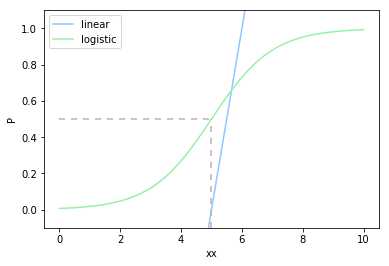

In [109]:
k = 1.
m = -5.
y = lambda x: k*x + m
#p = lambda x: np.exp(k*x+m) / (1+np.exp(k*x+m))
p = lambda x: 1 / (1+np.exp(-1*(k*x+m)))

xx = np.linspace(0,10)
plt.plot(xx,y(xx), label='linear')
plt.plot(xx,p(xx), label='logistic')
plt.plot([0,abs(m)], [0.5,0.5], dashes=(4,4), color='.7')
plt.plot([abs(m),abs(m)], [-.1,.5], dashes=(4,4), color='.7')

# limits, legends and labels
plt.ylim((-.1,1.1))
plt.legend(loc=2)
plt.ylabel('P')
plt.xlabel('xx')

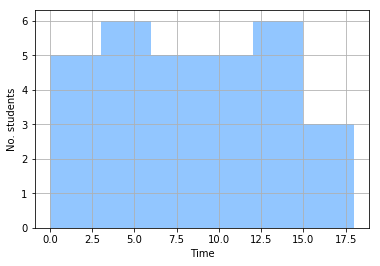

In [110]:
studytime=[0,0,1.5,2,2.5,3,3.5,4,4,4,5.5,6,6.5,7,7,8.5,9,9,9,10.5,10.5,12,12,12,12.5,13,14,15,16,18]
passed=[0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1,1,1,1,1]
data = pd.DataFrame(data=np.array([studytime, passed]).T, columns=['Time','Pass'])
data.Time.hist(bins=6)
plt.xlabel('Time')
plt.ylabel('No. students');

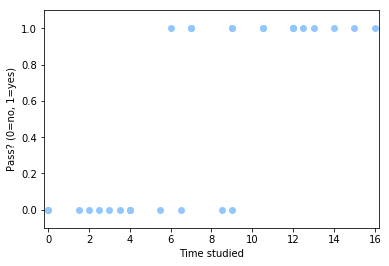

In [111]:
plt.plot(data.Time, data.Pass,'o', mew=0, ms=7,)
plt.ylim(-.1,1.1)
plt.xlim(-0.2,16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass? (0=no, 1=yes)');

In [112]:
probfit = sm.Logit(data.Pass, sm.add_constant(data.Time,prepend=True))

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [113]:
fit_results = probfit.fit()
print(fit_results.summary())

Optimization terminated successfully.
         Current function value: 0.251107
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   Pass   No. Observations:                   30
Model:                          Logit   Df Residuals:                       28
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Jul 2020   Pseudo R-squ.:                  0.6366
Time:                        17:01:16   Log-Likelihood:                -7.5332
converged:                       True   LL-Null:                       -20.728
Covariance Type:            nonrobust   LLR p-value:                 2.791e-07
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7980      2.240     -2.588      0.010     -10.188      -1.408
Time           0.8020      0.

In [114]:
logit_pars = fit_results.params
intercept_err, slope_err = np.diag(fit_results.cov_params())**.5
fit_results.cov_params()

,const,Time
const,5.017663,-0.635081
Time,-0.635081,0.088035


In [115]:
intercept = logit_pars['const']
slope = logit_pars['Time']
print(intercept,slope)

-5.797986708843619 0.8019792327180769


In [116]:
fit_results.conf_int()

,0,1
const,-10.188333,-1.407640
Time,0.220444,1.383514


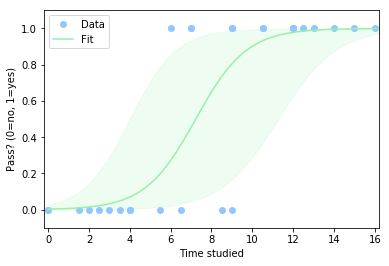

In [117]:
plt.plot(data.Time, data.Pass,'o', mew=0, ms=7, label='Data')
p = lambda x,k,m: 1 / (1+np.exp(-1*(k*x+m)))
xx = np.linspace(0,data.Time.max())
l1 = plt.plot(xx, p(xx,slope,intercept), label='Fit')
plt.fill_between(xx,
    p(xx,slope+slope_err**2, intercept+intercept_err),
    p(xx,slope-slope_err**2, intercept-intercept_err), 
    alpha=0.15,
    color=l1[0].get_color())
plt.ylim(-.1,1.1)
plt.xlim(-0.2,16.2)
plt.xlabel('Time studied')
plt.ylabel('Pass? (0=no, 1=yes)')
plt.legend(loc=2, numpoints=1);

In [118]:
target=0.5
x_prob = lambda p,k,m: (np.log(p/(1-p))-m)/k
T_max = x_prob(target, slope-slope_err, intercept-intercept_err)
T_min = x_prob(target, slope+slope_err, intercept+intercept_err)
T_best = x_prob(target, slope, intercept)
print('{0}% sucess rate: {1:.1f} +{2:.1f}/-{3:.1f}'.format(int(target*100),T_best,T_max-T_best,T_best-T_min))

50% sucess rate: 7.2 +8.7/-4.0


# Chapter 5
## Clustering
- A short introduction to cluster finding—reminding you of the general problem—and analgorithm to solve it
- Analysis of a dataset in the context of cluster finding-the Cholera outbreak in centralLondon 1854
    - By simple zeroth order analysis, calculating the centroid of the whole dataset
    - By finding the closest water pump for each recorded Cholera-related death
- Using the K-means nearest neighbor algorithm for cluster finding, applying it to data from Chapter 4 , Regression, and identifying two separate distributions
- Using hierarchical clustering by analyzing the distribution of galaxies in a confined slice of the Universe

In [119]:
deaths = pd.read_csv('data/cholera_deaths.txt')
deaths.head()

,X,Y
0,13.588010,11.095600
1,9.878124,12.559180
2,14.653980,10.180440
3,15.220570,9.993003
4,13.162650,12.963190


In [120]:
pumps = pd.read_csv('data/cholera_pumps.txt')
pumps.head()

,X,Y
0,8.651201,17.891600
1,10.984780,18.517851
2,13.378190,17.394541
3,14.879830,17.809919
4,8.694768,14.905470


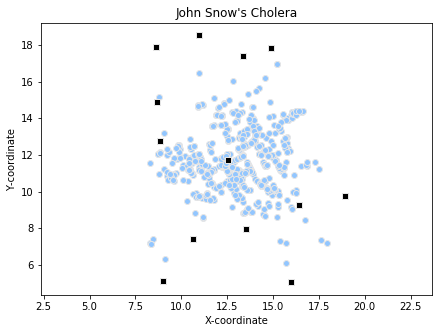

In [121]:
plt.figure(figsize=(7,5))
plt.plot(deaths['X'], deaths['Y'], marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'],pumps['Y'], marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)
plt.axis('equal')
plt.xlim((4.0,22.0));
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera');

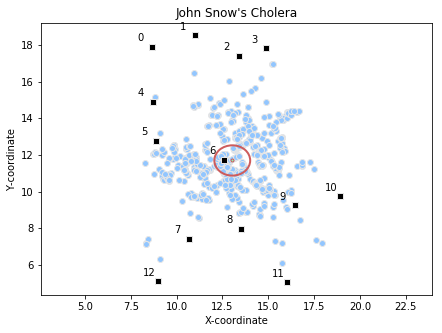

In [122]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
plt.plot(deaths['X'], deaths['Y'], marker='o', lw=0, mew=1, mec='0.9', ms=6)
plt.plot(pumps['X'], pumps['Y'], marker='s', lw=0, mew=1, mec='0.9', color='k', ms=6)

ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), width=deaths['X'].std(), height=deaths['Y'].std(),
                zorder=32, fc='None', ec='IndianRed', lw=2)

ax.add_artist(ellipse)
plt.plot(deaths['X'].mean(), deaths['Y'].mean(), '.', ms=6, mec='IndianRed', zorder=32)

for i in pumps.index:
    plt.annotate(s='{0}'.format(i), xy=(pumps[['X','Y']].loc[i]), xytext=(-15,6), textcoords='offset points')
    
plt.axis('equal')
plt.xlim((4.0,22.5));
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera');

In [123]:
deaths_tmp = deaths[['X','Y']].as_matrix()
idx_arr = np.array([], dtype='int')
for i in range(len(deaths)):
    idx_arr = np.append(idx_arr, 
                        (pumps.subtract(deaths_tmp[i])).apply(lambda x:x**2).sum(axis=1).apply(lambda x:x**0.5).idxmin() )
deaths['C'] = idx_arr

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [124]:
deaths.head()

,X,Y,C
0,13.588010,11.095600,6
1,9.878124,12.559180,5
2,14.653980,10.180440,9
3,15.220570,9.993003,9
4,13.162650,12.963190,6


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


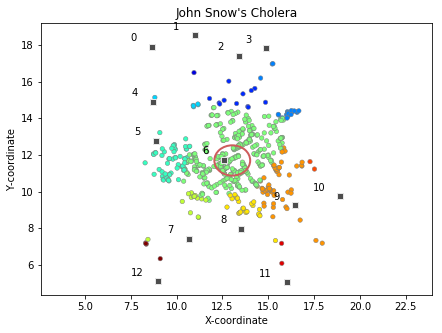

In [125]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
np.unique(deaths['C'].values)

plt.scatter(deaths['X'].as_matrix(), deaths['Y'].as_matrix(), color=plt.cm.jet(deaths['C']/12.), 
            marker='o', lw=0.5, edgecolors='0.5', s=20)
plt.plot(pumps['X'],pumps['Y'], marker='s', lw=0, mew=1, mec='0.9', color='0.3', ms=6)

for i in pumps.index:
    plt.annotate(s='{0}'.format(i), xy=(pumps[['X','Y']].loc[i]), 
                 xytext=(-15,6), textcoords='offset points', ha='right')
    
ellipse = Ellipse(xy=(deaths['X'].mean(), deaths['Y'].mean()), width=deaths['X'].std(), height=deaths['Y'].std(),
                zorder=32, fc='None', ec='IndianRed', lw=2)

ax.add_artist(ellipse)
plt.axis('equal')
plt.xlim((4.0,22.5))
plt.xlabel('X-coordinate')
plt.ylabel('Y-coordinate')
plt.title('John Snow\'s Cholera');

In [126]:
TABLE_FILE = 'data/data_ch4.h5'
d2 = pd.read_hdf(TABLE_FILE)
d2 = d2.dropna()

In [127]:
rates = d2[['DFE','GDP_CD','Both']].as_matrix().astype('float')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


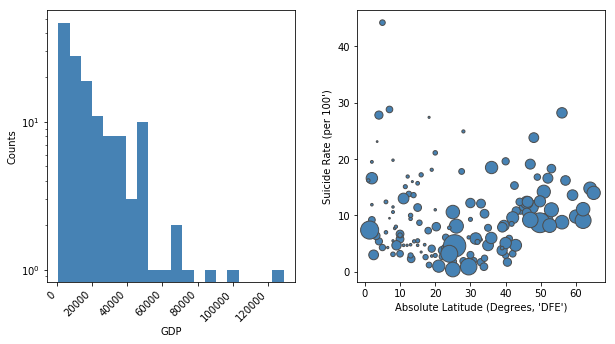

In [139]:
plt.subplots(12, figsize=(10,5))
plt.subplot(121)
plt.hist(rates.T[1], bins=20,color='SteelBlue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.xlabel('GDP')
plt.ylabel('Counts')

plt.subplot(122)
plt.scatter(rates.T[0], rates.T[2], s=5e2*rates.T[1]/rates.T[1].max(), color='SteelBlue', edgecolors='0.3');
plt.xlabel('Absolute Latitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100\')')
plt.subplots_adjust(wspace=0.25);

In [136]:
w = vq.whiten(rates)

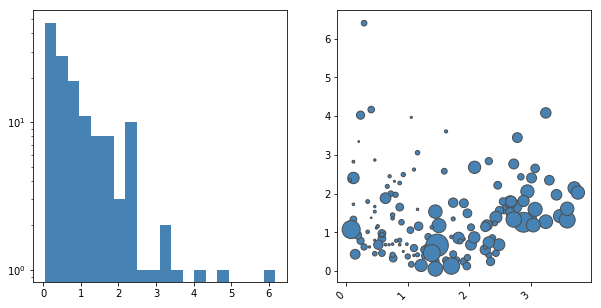

In [142]:
plt.subplots(12, figsize=(10,5))
plt.subplot(121)
plt.hist(w[:,1], bins=20, color='SteelBlue')
plt.yscale('log')
plt.subplot(122)
plt.scatter(w.T[0], w.T[2], s=5e2*w.T[1]/w.T[1].max(), color='SteelBlue', edgecolors='0.3')
plt.xticks(rotation=45, ha='right');

In [143]:
sc = rates.std(axis=0)

In [144]:
init_guess = np.array([[20,20E3,10],[45,100E3,15]])
init_guess /= sc
z2_cb, z2_lbl = vq.kmeans2(w, init_guess, minit='matrix', iter=500)

In [145]:
z2_cb_sc = z2_cb * sc

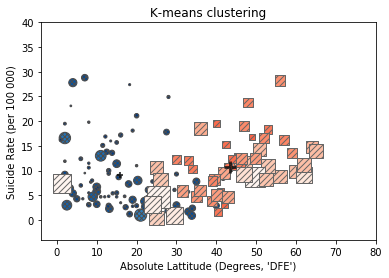

In [154]:
plt.figure(figsize=(6,4))
plt.scatter(z2_cb_sc[0,0], z2_cb_sc[0,2], 
            s=5e2*z2_cb_sc[0,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=2, zorder=10, alpha=0.7);
plt.scatter(z2_cb_sc[1,0], z2_cb_sc[1,2], 
            s=5e2*z2_cb_sc[1,1]/rates.T[1].max(), 
            marker='+', color='k', edgecolors='k', 
            lw=3, zorder=10, alpha=0.7);

s0 = abs(z2_lbl==0).astype('bool')
s1 = abs(z2_lbl==1).astype('bool')
pattern1 = 5*'x'
pattern2 = 4*'/'
plt.scatter(w.T[0][s0]*sc[0], 
            w.T[2][s0]*sc[2], 
            s=5e2*rates.T[1][s0]/rates.T[1].max(),
            lw=1,
            hatch=pattern1,
            edgecolors='0.3',
            color=plt.cm.Blues_r(
                rates.T[1][s0]/rates.T[1].max()));
plt.scatter(rates.T[0][s1],
            rates.T[2][s1], 
            s=5e2*rates.T[1][s1]/rates.T[1].max(),
            lw=1,
            hatch=pattern2,
            edgecolors='0.4',
            marker='s',
            color=plt.cm.Reds_r(
                rates.T[1][s1]/rates.T[1].max()+0.4))

#for i in range(len(rates.T[0][s0])):
#    plt.plot([z2_cb_sc[0,0], rates.T[0][s0][i]],
#             [z2_cb_sc[0,2], rates.T[2][s0][i]], 
#             color='SteelBlue', lw=2, alpha=0.4, 
#             zorder=-1)
#for i in range(len(rates.T[0][s1])):
#    plt.plot([z2_cb_sc[1,0], rates.T[0][s1][i]],
#             [z2_cb_sc[1,2], rates.T[2][s1][i]], 
#             color='IndianRed', lw=2, alpha=0.4, 
#             zorder=-1)

# create some *empty* patches to use for legend, 
p1 = plt.scatter([],[], hatch='None', 
                 s=20E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p2 = plt.scatter([],[], hatch='None',
                 s=40E3*5e2/rates.T[1].max(),  
                 color='k', edgecolors='None',)
p3 = plt.scatter([],[], hatch='None',
                 s=60E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)
p4 = plt.scatter([],[], hatch='None',
                 s=80E3*5e2/rates.T[1].max(), 
                 color='k', edgecolors='None',)

labels = ["20\'", "40\'", "60\'", ">80\'"]

'''plt.legend([p1, p2, p3, p4], labels, ncol=1, 
           frameon=True, handlelength=1, 
           loc=1, borderpad=0.75,labelspacing=0.75,
           handletextpad=0.75, title='GDP', scatterpoints=1.5)'''
plt.ylim((-4,40))
plt.xlim((-4,80))
plt.title('K-means clustering')
plt.xlabel('Absolute Lattitude (Degrees, \'DFE\')')
plt.ylabel('Suicide Rate (per 100 000)');

In [158]:
uzcat = pd.read_csv('data/uzcJ2000.tab', sep='\t', header=16, dtype='str',
                   names=['ra', 'dec', 'Zmag', 'cz', 'cze', 'T', 'U', 'Ne','Zname', 'C', 'Ref', 'Oname', 'M', 'N'],
                   skiprows=[17])

In [159]:
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,000237.9,+163838,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,000246.3,+185310,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,000257.0,+041231,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,000302.9,+185221,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,000305.6,-015450,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [160]:
uzcat['ra'] = uzcat['ra'].apply(lambda x: '{0}h{1}m{2}s'.format(x[:2],x[2:4],x[4:]))
uzcat['dec'] = uzcat['dec'].apply(lambda x: '{0}d{1}m{2}s'.format(x[:3],x[3:5],x[5:]))

In [161]:
uzcat.head()

,ra,dec,Zmag,cz,cze,T,U,Ne,Zname,C,Ref,Oname,M,N
0,00h02m37.9s,+16d38m38s,14.9,6350,19,A,1,0,000000+16220,F,,I5378S,,
1,00h02m46.3s,+18d53m10s,14.8,7864,47,A,0,0,000012+18370,Z,0650,00002+1837,,
2,00h02m57.0s,+04d12m31s,15.5,8695,40,E,0,0,000030+03560,Z,2700,00005+0356,,
3,00h03m02.9s,+18d52m21s,15.5,8007,39,E,0,0,000030+18360,Z,0650,00005+1836,,
4,00h03m05.6s,-01d54m50s,14.3,7298,42,B,0,0,000036-02110,Z,2218,00006-0211,,


In [162]:
uzcat = uzcat.applymap(lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
uzcat['cz'] = uzcat['cz'].astype('float')

In [163]:
coords_uzc = coord.SkyCoord(uzcat['ra'], uzcat['dec'], frame='fk5', equinox='J2000')

In [164]:
coords_uzc.ra.deg.min()

0.007083333333333332

In [165]:
color_czs = (uzcat['cz']+abs(uzcat['cz'].min())) / (uzcat['cz'].max()+abs(uzcat['cz'].min()))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\projections\geo.py:426: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


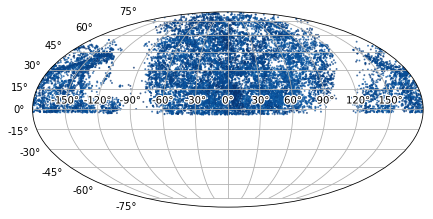

In [167]:
whitebg = withStroke(foreground="w", linewidth=2.5)
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(coords_uzc.ra.radian-np.pi, coords_uzc.dec.radian, color=plt.cm.Blues_r(color_czs), alpha=0.6,
           s=4, marker='.', zorder=-1)

plt.grid()

for tick in ax.get_xticklabels():
    tick.set_path_effects([whitebg])

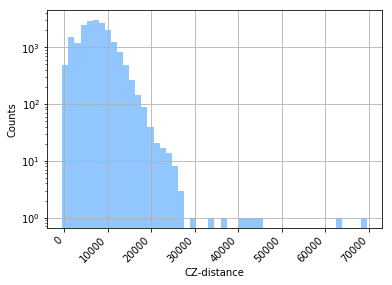

In [170]:
uzcat['cz'].hist(bins=50)
plt.yscale('log')
plt.xlabel('CZ-distance')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right');

In [171]:
uzc_czs = uzcat['cz'].as_matrix()
uzcat['Zmag'] = uzcat['Zmag'].astype('float')
decmin = 15
decmax = 30
ramin = 90
ramax = 295
czmin = 0
czmax = 12500
selection_dec = (coords_uzc.dec.deg>decmin) * (coords_uzc.dec.deg<decmax)
selection_ra = (coords_uzc.ra.deg>ramin) * (coords_uzc.ra.deg<ramax)
selection_czs = (uzc_czs>czmin) * (uzc_czs<czmax)
selection= selection_dec * selection_ra * selection_czs

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in less
  # This is added back by InteractiveShellApp.init_path()


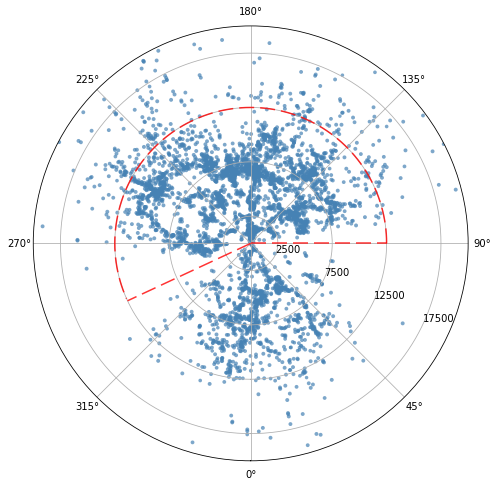

In [174]:
fig = plt.figure( figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection_dec], uzc_czs[selection_dec], color='SteelBlue', 
                 s=uzcat['Zmag'][selection_dec*selection_czs], edgecolors="none", alpha=0.7,zorder=0)

ax.set_rlim(0,20000)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,20001,5000));

ax.plot([(ramin*u.deg).to(u.radian).value, (ramin*u.deg).to(u.radian).value], [0,12500], 
        color='Red', alpha=0.8, dashes=(10,4))
ax.plot([ramax*np.pi/180., ramax*np.pi/180.], [0,12500], color='Red', alpha=0.8, dashes=(10,4))

theta = np.arange(ramin, ramax, 1)

ax.plot(theta*np.pi/180., np.ones_like(theta)*12500, color='Red', alpha=0.8, dashes=(10,4));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


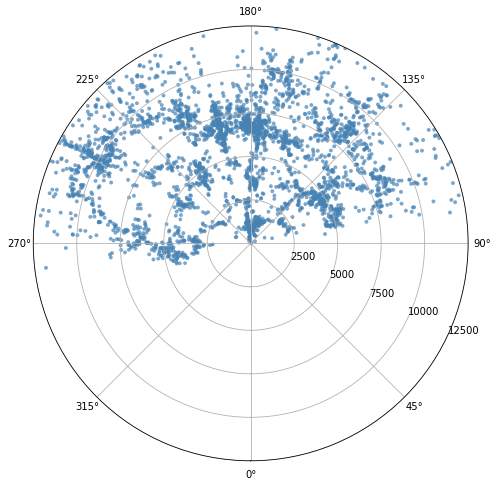

In [175]:
fig = plt.figure( figsize=(8,8))
ax = fig.add_subplot(111, polar=True)
sct = ax.scatter(coords_uzc.ra.radian[selection], uzc_czs[selection], color='SteelBlue',
            s=uzcat['Zmag'].as_matrix().astype('float')[selection], edgecolors="none", alpha=0.7, zorder=0)

ax.set_rlim(0,12500)
ax.set_theta_offset(np.pi/-2)
ax.set_rlabel_position(65)
ax.set_rticks(range(2500,12501,2500));

In [176]:
mycat = uzcat.copy(deep=True).loc[selection]
mycat['ra_deg'] = coords_uzc.ra.deg[selection]
mycat['dec_deg'] = coords_uzc.dec.deg[selection]

In [178]:
zs = (((mycat['cz'].as_matrix()*u.km/u.s) / c.c).decompose())
dist = coord.Distance(z=zs)
print(dist)
mycat['dist'] = dist

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


[ 64.24925747 176.13700061 148.71016103 ...  65.7883652   63.23869657
  58.79319086] Mpc


In [180]:
coords_xyz = coord.SkyCoord(ra=mycat['ra_deg']*u.deg, dec=mycat['dec_deg']*u.deg, distance=dist*u.Mpc, frame='fk5', equinox='J2000')

In [181]:
mycat['X'] = coords_xyz.cartesian.x.value
mycat['Y'] = coords_xyz.cartesian.y.value
mycat['Z'] = coords_xyz.cartesian.z.value

In [182]:
mycat[['X','Y','Z','ra_deg', 'dec_deg', 'dist']].head()

,X,Y,Z,ra_deg,dec_deg,dist
3201,-7.415063,59.296118,23.599879,97.127917,21.550278,64.249257
3221,-24.108044,155.825928,78.494110,98.794583,26.464444,176.137001
3231,-22.326003,131.192624,66.368343,99.657917,26.506111,148.710161
3249,-16.733044,89.758751,44.632263,100.560000,26.050556,101.630050
3254,-14.093227,73.710360,28.816059,100.824167,21.005833,80.387820


In [184]:
mycat[['X','Y','Z','ra_deg', 'dec_deg', 'dist']].describe()

,X,Y,Z,ra_deg,dec_deg,dist
count,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000,3259.000000
mean,-66.281014,-9.706444,39.221136,186.203655,22.481214,102.592675
std,38.758979,66.895756,17.955328,46.249371,4.362414,42.411576
min,-178.264199,-170.290447,0.181666,97.127917,15.000833,0.457668
25%,-95.458482,-54.860522,26.678963,149.190208,18.505417,71.612280
50%,-70.205916,-1.858339,39.062558,182.644583,22.324444,103.432200
75%,-34.924488,37.349354,51.315316,220.861667,26.526667,134.055876
max,20.095263,167.168635,92.489229,286.765417,29.999722,190.068326


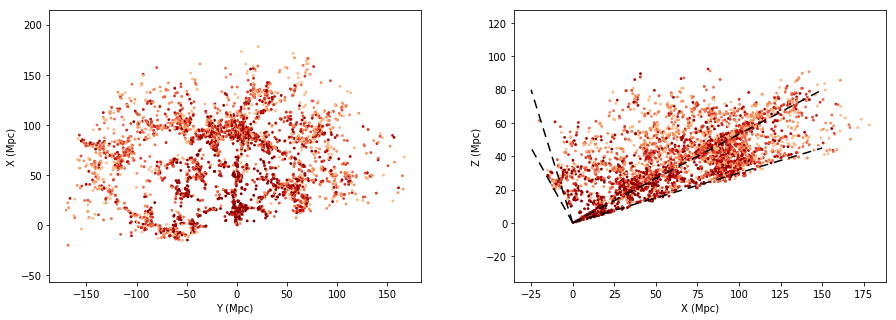

In [186]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

plt.subplot(121)
plt.scatter(mycat['Y'], -1*mycat['X'], s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.axis('equal');


plt.subplot(122)
plt.scatter(-1*mycat['X'],mycat['Z'], 
            s=8, color=plt.cm.OrRd_r(10**(mycat.Zmag-mycat.Zmag.max()) ), edgecolor='None')
lstyle = dict(lw=1.5, color='k', dashes=(6,4))
plt.plot([0,150], [0,80], **lstyle)
plt.plot([0,150], [0,45], **lstyle)
plt.plot([0,-25], [0,80], **lstyle)
plt.plot([0,-25], [0,45], **lstyle)
plt.xlabel('X (Mpc)'); plt.ylabel('Z (Mpc)')
plt.axis('equal')
plt.subplots_adjust(wspace=0.25);

In [187]:
mycat.to_pickle('data/data_ch5_clustering.pick')

In [188]:
TABLE_FILE = 'data/data_ch5_clustering.h5'
mycat.to_hdf(TABLE_FILE, 'ch5data', mode='w', table=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->['ra', 'dec', 'cze', 'T', 'U', 'Ne', 'Zname', 'C', 'Ref', 'Oname', 'M', 'N']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


In [189]:
galpos = np.array([mycat.X,mycat.Y]).T

In [190]:
z_centroid = hac.linkage(galpos, metric = 'euclidean', method = 'centroid')

In [191]:
z_centroid.shape

(3258, 4)

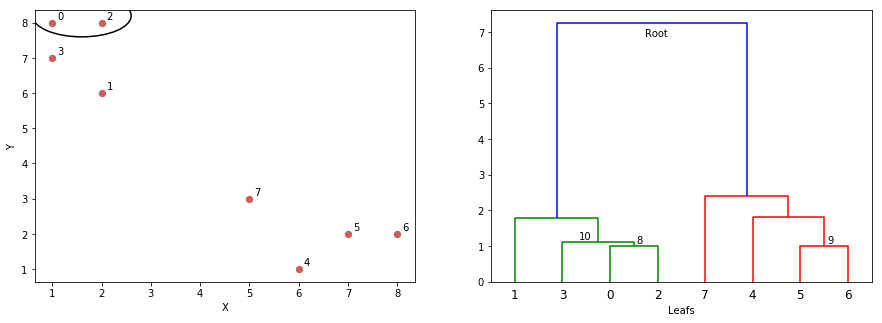

In [194]:
x = np.array([1,2,2,1,6,7,8,5])
y = np.array([8,6,8,7,1,2,2,3])
a = np.array([x,y]).T
z = hac.linkage(a, metric = 'euclidean', method = 'centroid')

fig, axs = plt.subplots(1,2,figsize=(15,5))

axs[0].scatter(x,y, marker='o', s=40, c='IndianRed')
axs[0].set_xlabel('X'); axs[0].set_ylabel('Y');

for i in range(len(x)):
    axs[0].annotate(s=str(i), xy=(x[i]+0.1,y[i]+0.1))
    
ellipse1 = Ellipse(xy=(1.6,8.2), width=2., height=1.2, zorder=32, fc='None', ec='k', lw=1.5)
axs[0].add_artist(ellipse1)

d_temp = hac.dendrogram(z, ax=axs[1])

axs[1].annotate(s='8', xy=(np.mean(d_temp['icoord'][0][1:-1]), d_temp['dcoord'][0][1]),
                xytext=(3,3), textcoords='offset points')
axs[1].annotate(s='9', xy=(np.mean(d_temp['icoord'][3][1:-1]), d_temp['dcoord'][3][1]),
                xytext=(3,3), textcoords='offset points')#, ha='right')
axs[1].annotate(s='10', xy=(np.mean(d_temp['icoord'][1][1:-1])-2, d_temp['dcoord'][1][1]),
                xytext=(3,3), textcoords='offset points', ha='right')
axs[1].annotate(s='Root', xy=(np.mean(d_temp['icoord'][-1][1:-1]), d_temp['dcoord'][-1][1]-0.3),
                xytext=(5,5), textcoords='offset points', va='top', ha='center')

axs[1].set_xlabel('Leafs');

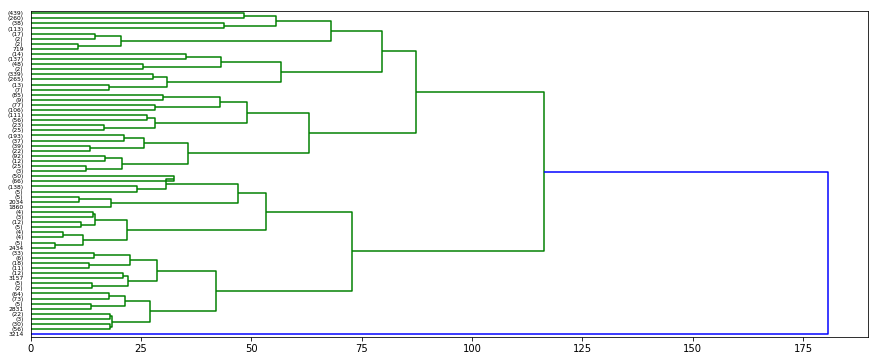

In [195]:
fig, ax = plt.subplots(1, figsize=(15,6))
d0 = hac.dendrogram(z_centroid, p=6, truncate_mode='level', orientation='right', ax=ax);

In [196]:
nclust = 20
part_centroid = hac.fcluster(z_centroid, 20, criterion='maxclust')

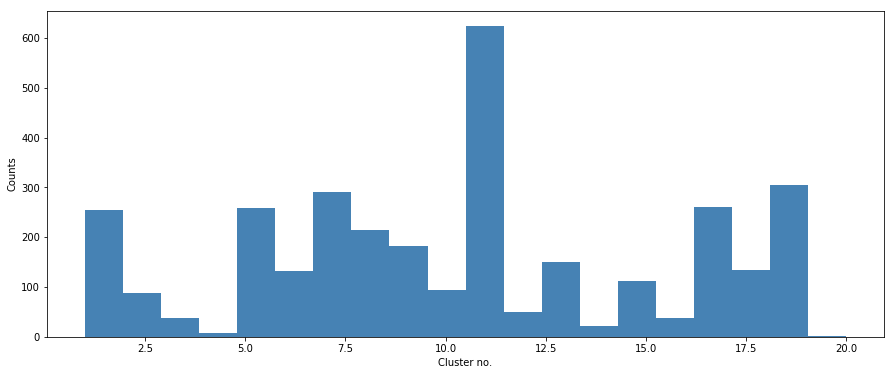

In [197]:
plt.figure(figsize=(15,6))
otpt = plt.hist(part_centroid, color='SteelBlue', bins=nclust);
plt.xlabel('Cluster no.'); plt.ylabel('Counts');

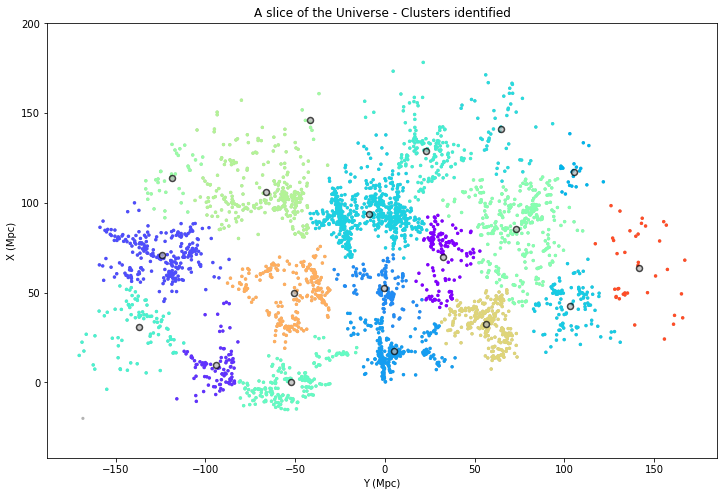

In [201]:
plt.figure(figsize=(12,8))
plt.subplot(111)
part = part_centroid
levels = np.arange(nclust)
colors = plt.cm.rainbow(np.random.rand(len(levels)))
for n, color in zip(levels, colors):
    plt.scatter(mycat['Y'][part==n], -1*mycat['X'][part==n], s=12, color=color, edgecolor='None')
    plt.plot(mycat['Y'][part==n].mean(), -1*mycat['X'][part==n].mean(), 
             'o', c='0.7', mec='k', ms=6, ls='None', mew=1.5, alpha=0.7)    
plt.xlabel('Y (Mpc)'); plt.ylabel('X (Mpc)')
plt.scatter(mycat['Y'], -1*mycat['X'], s=10, color='0.7', edgecolor='None',zorder=-1)
plt.title('A slice of the Universe - Clusters identified')
plt.axis('equal');